In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
K = range(2, 11)

In [ ]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


Text(0, 0.5, 'Inertia')

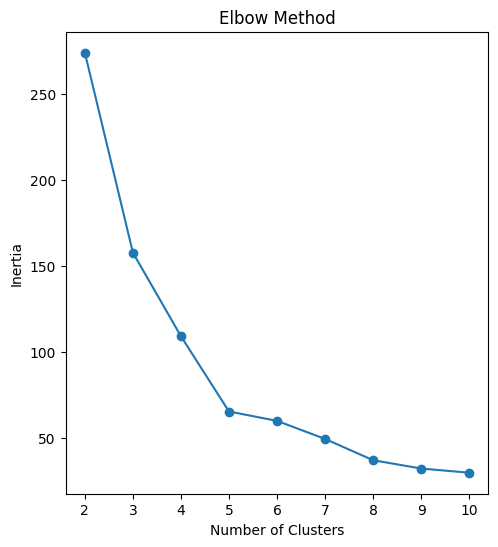

In [ ]:
# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


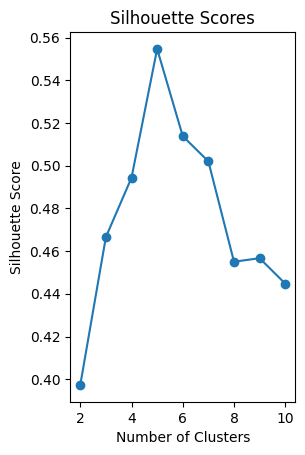

In [ ]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()


In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


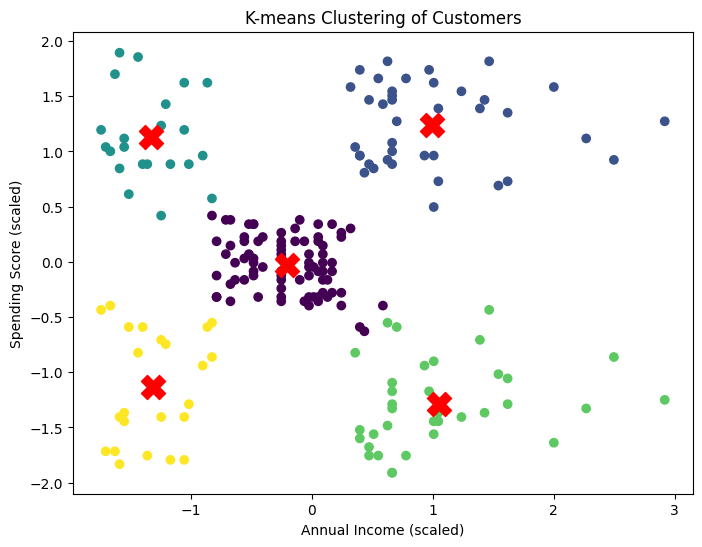

In [ ]:
#Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


In [ ]:
# Display the clustered data
print(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                  15                      39        4
1             2                  15                      81        2
2             3                  16                       6        4
3             4                  16                      77        2
4             5                  17                      40        4
..          ...                 ...                     ...      ...
195         196                 120                      79        1
196         197                 126                      28        3
197         198                 126                      74        1
198         199                 137                      18        3
199         200                 137                      83        1

[200 rows x 4 columns]
